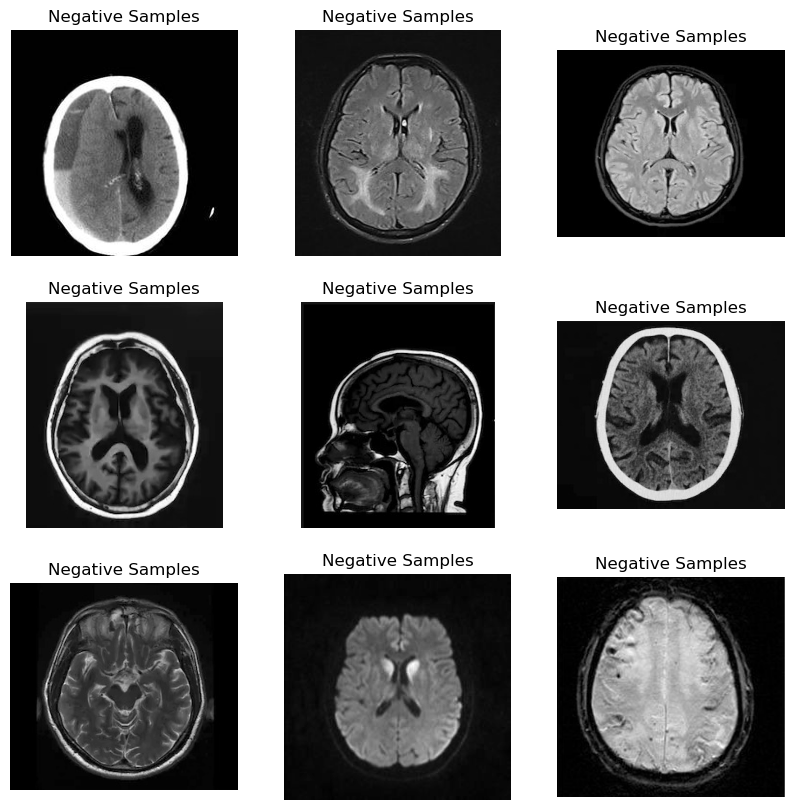

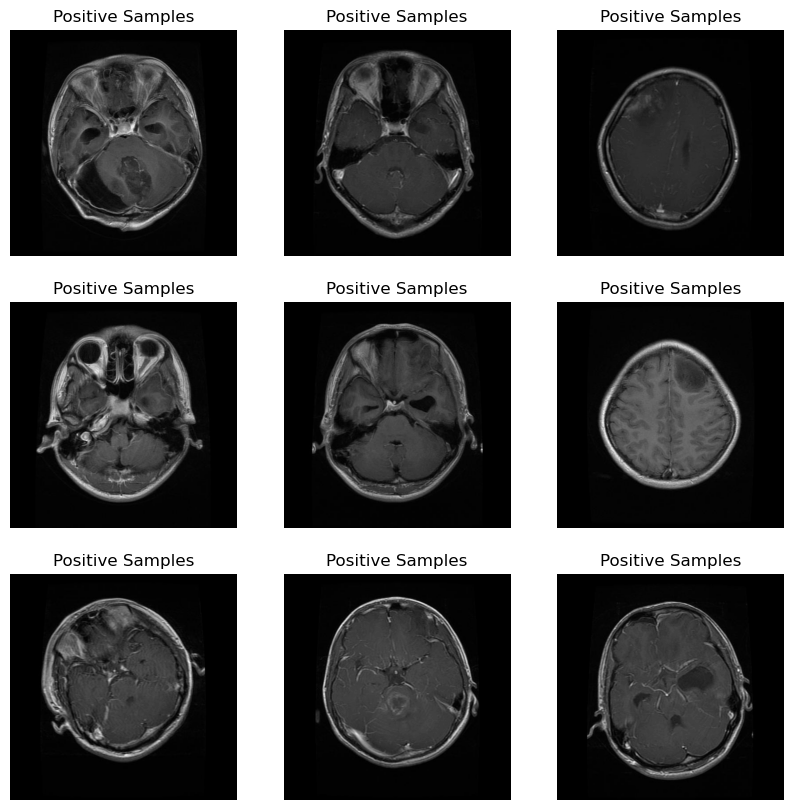

Unique image sizes: {(417, 428), (249, 206), (320, 257), (510, 485), (282, 230), (342, 290), (504, 450), (326, 273), (274, 244), (649, 926), (224, 234), (225, 208), (600, 652), (424, 417), (554, 554), (332, 590), (480, 852), (248, 200), (1075, 890), (446, 450), (337, 305), (257, 196), (450, 600), (377, 341), (249, 201), (393, 313), (528, 528), (228, 236), (239, 236), (210, 200), (293, 216), (274, 230), (872, 850), (394, 295), (243, 233), (395, 367), (236, 212), (217, 208), (356, 286), (369, 503), (605, 600), (269, 236), (489, 416), (237, 213), (230, 174), (401, 312), (214, 229), (262, 224), (280, 278), (220, 236), (303, 252), (304, 235), (192, 192), (221, 228), (496, 414), (253, 278), (225, 207), (225, 225), (277, 235), (248, 208), (340, 291), (250, 236), (216, 234), (350, 350), (228, 235), (442, 442), (239, 253), (201, 236), (624, 491), (357, 236), (195, 314), (213, 210), (506, 444), (244, 206), (395, 366), (273, 251), (236, 211), (359, 300), (418, 364), (251, 205), (218, 180), (228, 

In [33]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

# Function to load images from a directory and preprocess them
def load_and_preprocess_images(directory):
    image_list = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Assuming all images are in jpg format
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path).convert('L')  # Convert to grayscale
            image_list.append(np.array(image))
    return image_list

# Function to display sample images
def display_sample_images(image_list, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image_list[i], cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load negative and positive images
negative_directory = "C:\\Users\\asuto\\Desktop\\intern ship 2\\archive(3)\\Brain_Tumor_Dataset\\Negative"  # Replace with your path
positive_directory = "C:\\Users\\asuto\\Desktop\\intern ship 2\\archive(3)\\Brain_Tumor_Dataset\\Positive"  # Replace with your path
negative_images = load_and_preprocess_images(negative_directory)
positive_images = load_and_preprocess_images(positive_directory)

# Display sample images
display_sample_images(negative_images, 'Negative Samples')
display_sample_images(positive_images, 'Positive Samples')

# EDA: Check dimensions and pixel statistics
image_sizes = [image.shape for image in negative_images + positive_images]
unique_sizes = set(image_sizes)
print(f'Unique image sizes: {unique_sizes}')

# Calculate mean and standard deviation for pixel values
pixel_values = np.concatenate([image.flatten() for image in negative_images + positive_images])
mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
print(f'Mean pixel value: {mean_pixel_value}')
print(f'Standard deviation of pixel values: {std_pixel_value}')

# Preprocess images (resize and normalize)
standard_size = (224, 224)
preprocessed_images = [np.array(Image.fromarray(image).resize(standard_size)) / 255.0 for image in negative_images + positive_images]


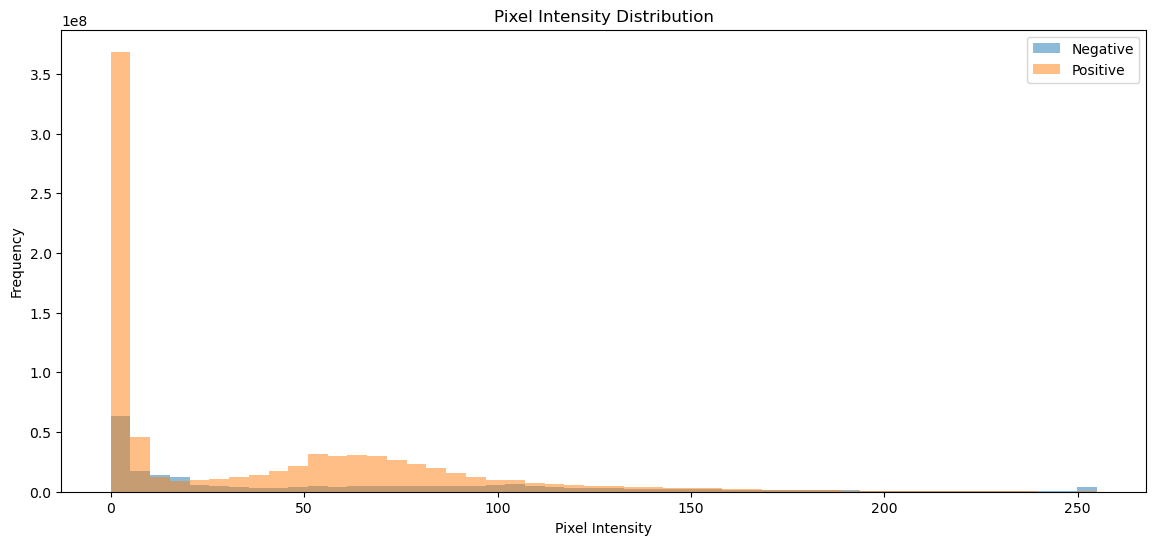

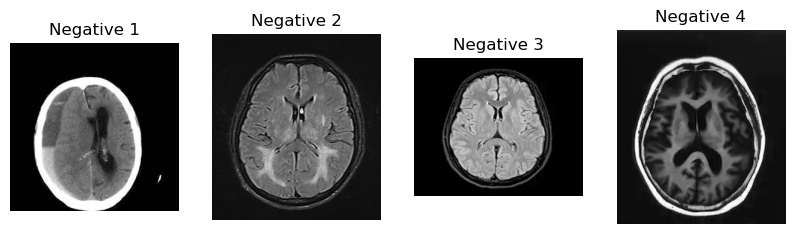

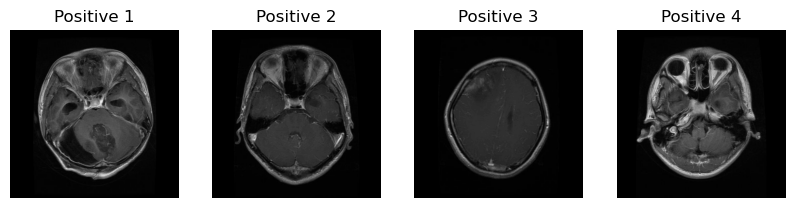

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Paths to the folders containing the negative and positive images
negative_folder_path = "C:\\Users\\asuto\\Desktop\\intern ship 2\\archive(3)\\Brain_Tumor_Dataset\\Negative"  # Replace with the actual path to the negative images
positive_folder_path = "C:\\Users\\asuto\\Desktop\\intern ship 2\\archive(3)\\Brain_Tumor_Dataset\\Positive" # Replace with the actual path to the positive images

# Function to load all images from a folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):  # Assuming images are in jpg format
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            images.append(np.array(img))
    return images

# Load all negative and positive images
negative_images = load_images_from_folder(negative_folder_path)
positive_images = load_images_from_folder(positive_folder_path)

# Function to plot pixel intensity distribution
def plot_pixel_intensity_distribution(images, label):
    pixel_values = np.concatenate([image.flatten() for image in images])
    plt.hist(pixel_values, bins=50, alpha=0.5, label=label)
    plt.legend()
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Function to display a grid of images
def display_images(images, title, num_images=4):
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(images[:num_images]):
        plt.subplot(1, num_images, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f'{title} {i+1}')
        plt.axis('off')
    plt.show()

# Perform EDA
# Plot pixel intensity distribution for both negative and positive images
plt.figure(figsize=(14, 6))
plot_pixel_intensity_distribution(negative_images, 'Negative')
plot_pixel_intensity_distribution(positive_images, 'Positive')
plt.show()

# Display a few negative images
display_images(negative_images, 'Negative')

# Display a few positive images
display_images(positive_images, 'Positive')


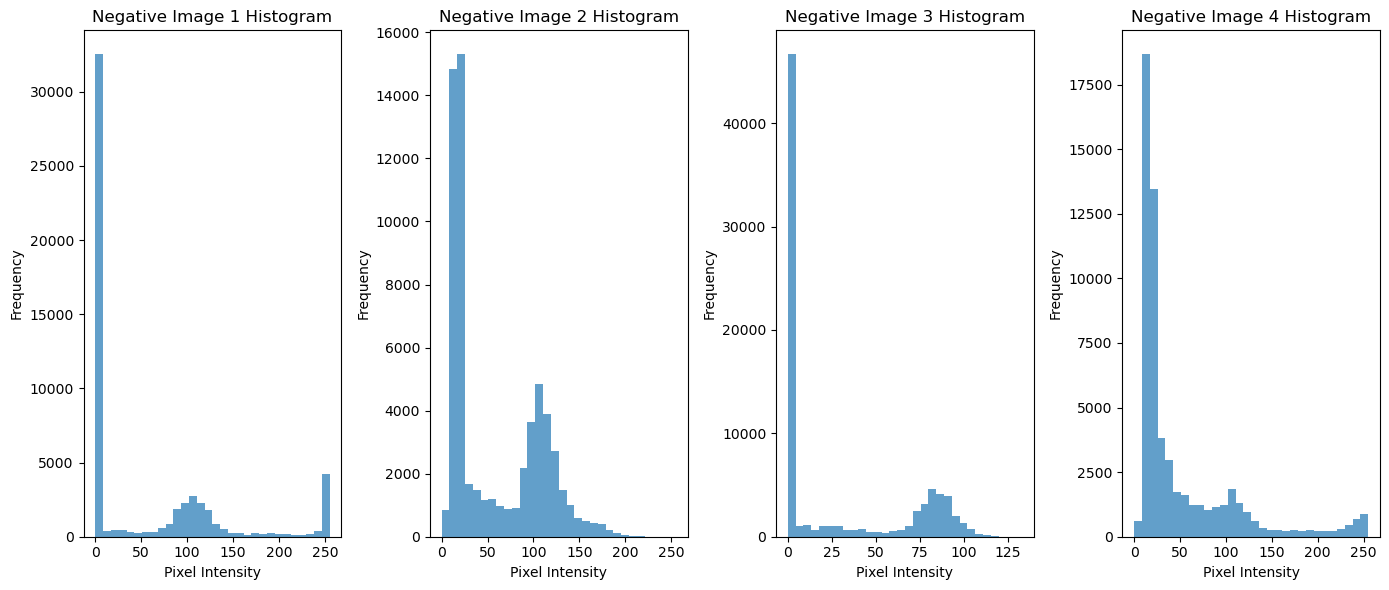

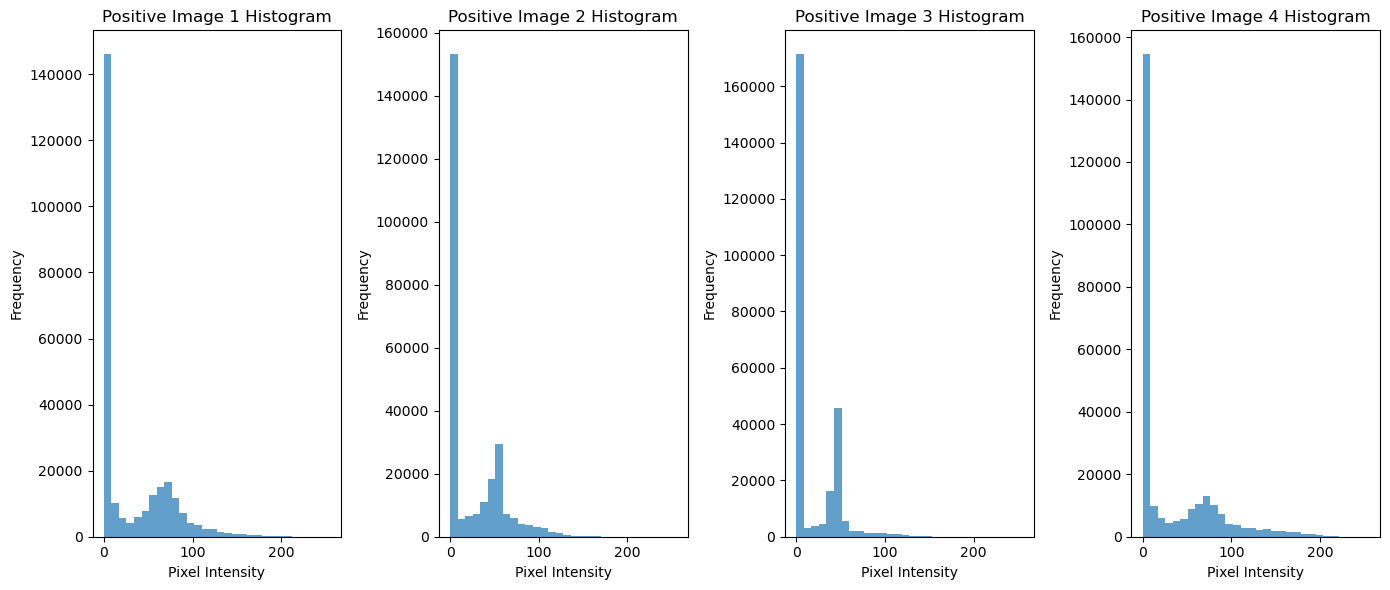

Number of negative images: 2000
Number of positive images: 3266


In [35]:
# Plot histograms for individual images
def plot_individual_histograms(images, label):
    plt.figure(figsize=(14, 6))
    for i, image in enumerate(images[:4]):  # Plot histograms for the first 4 images
        np_image = np.array(image)  # Convert to numpy array
        plt.subplot(1, 4, i+1)
        plt.hist(np_image.flatten(), bins=30, alpha=0.7)
        plt.title(f'{label} Image {i+1} Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_individual_histograms(negative_images, 'Negative')
plot_individual_histograms(positive_images, 'Positive')

# Check class balance
num_negative = len(negative_images)
num_positive = len(positive_images)
print(f'Number of negative images: {num_negative}')
print(f'Number of positive images: {num_positive}')

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to load images and assign labels
def load_images_and_labels(folder_path, label):
    images = []
    labels = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        img = cv2.resize(img, (64, 64))  # Resize the image
        images.append(img)
        labels.append(label)
    return images, labels

# Define the paths to the image folders
negative_folder_path = "C:\\Users\\asuto\\Desktop\\intern ship 2\\archive(3)\\Brain_Tumor_Dataset\\Negative"  # Update this path
positive_folder_path = "C:\\Users\\asuto\\Desktop\\intern ship 2\\archive(3)\\Brain_Tumor_Dataset\\Positive"  # Update this path

# Load negative and positive images
negative_images, negative_labels = load_images_and_labels(negative_folder_path, 0)
positive_images, positive_labels = load_images_and_labels(positive_folder_path, 1)

# Combine data and convert to numpy arrays
X = np.array(negative_images + positive_images)
y = np.array(negative_labels + positive_labels)

# Normalize the data
X = X / 255.0

# Add a channel dimension (needed for CNN)
X = X.reshape(-1, 64, 64, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Train the model
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('brain_tumor_classifier.h5')
print("Model saved successfully!")

Epoch 1/10
132/132 [==============================] - 8s 56ms/step - loss: 0.4646 - accuracy: 0.7811 - val_loss: 0.3214 - val_accuracy: 0.8814
Epoch 2/10
132/132 [==============================] - 7s 56ms/step - loss: 0.3027 - accuracy: 0.8780 - val_loss: 0.2839 - val_accuracy: 0.8843
Epoch 3/10
132/132 [==============================] - 7s 55ms/step - loss: 0.2500 - accuracy: 0.9076 - val_loss: 0.3408 - val_accuracy: 0.8624
Epoch 4/10
132/132 [==============================] - 7s 53ms/step - loss: 0.2236 - accuracy: 0.9155 - val_loss: 0.5011 - val_accuracy: 0.7713
Epoch 5/10
132/132 [==============================] - 7s 54ms/step - loss: 0.2105 - accuracy: 0.9236 - val_loss: 0.7620 - val_accuracy: 0.7087
Epoch 6/10
132/132 [==============================] - 7s 54ms/step - loss: 0.1941 - accuracy: 0.9262 - val_loss: 0.3527 - val_accuracy: 0.8700
Epoch 7/10
132/132 [==============================] - 7s 53ms/step - loss: 0.1789 - accuracy: 0.9366 - val_loss: 0.8651 - val_accuracy: 0.7116

In [37]:
from tensorflow.keras.models import load_model

# Load the trained model (make sure to provide the correct path to your model file)
model = load_model("C:\\Users\\asuto\\Desktop\\intern ship 2\\brain_tumor_classifier.h5")

def preprocess_image(image_path, target_size=(64, 64)):
    """ Preprocess the image for the CNN model. """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Assuming the model was trained on grayscale images
    img = cv2.resize(img, target_size)  # Resize to the same size as model training
    img = img.astype('float32') / 255  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict(image_path):
    """ Use the CNN model to predict whether the image is negative or positive. """
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    return 'Positive' if prediction > 0.5 else 'Negative'

# Example of using the predict function
image_path = "C:\\Users\\asuto\\Desktop\\intern ship 2\\archive(3)\\Brain_Tumor_Dataset\\Positive\\Te-gl_0021.jpg"  # Replace with your image path
result = predict(image_path)
print(f"The image is classified as: {result}")


1/1 [==============================] - 0s 63ms/step
The image is classified as: Positive


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Assuming each image is resized to 64x64 pixels
n_rows, n_cols = 64, 64  # Height and width of the image
n_units = 64  # Number of units in the RNN layer

# Create the RNN model
model = Sequential()
# Adding return_sequences=True to get output from all RNN units
model.add(SimpleRNN(n_units, return_sequences=True, input_shape=(n_rows, n_cols)))
model.add(Flatten())  # Flatten the output to feed into a Dense layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
# Assuming X_train and y_train are already loaded and preprocessed
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('brain_tumor_rnn_classifier.h5')
print("RNN model saved successfully!")

Epoch 1/10
106/106 [==============================] - 3s 18ms/step - loss: 0.3543 - accuracy: 0.8468 - val_loss: 0.2534 - val_accuracy: 0.9122
Epoch 2/10
106/106 [==============================] - 1s 13ms/step - loss: 0.2100 - accuracy: 0.9243 - val_loss: 0.2444 - val_accuracy: 0.9170
Epoch 3/10
106/106 [==============================] - 1s 13ms/step - loss: 0.1676 - accuracy: 0.9394 - val_loss: 0.1750 - val_accuracy: 0.9466
Epoch 4/10
106/106 [==============================] - 1s 13ms/step - loss: 0.1426 - accuracy: 0.9507 - val_loss: 0.1971 - val_accuracy: 0.9383
Epoch 5/10
106/106 [==============================] - 1s 13ms/step - loss: 0.1059 - accuracy: 0.9656 - val_loss: 0.1753 - val_accuracy: 0.9431
Epoch 6/10
106/106 [==============================] - 1s 13ms/step - loss: 0.0898 - accuracy: 0.9706 - val_loss: 0.1586 - val_accuracy: 0.9490
Epoch 7/10
106/106 [==============================] - 1s 13ms/step - loss: 0.0813 - accuracy: 0.9700 - val_loss: 0.1565 - val_accuracy: 0.9514

In [39]:
from tensorflow.keras.models import load_model

# Load the trained RNN model (make sure to provide the correct path to your model file)
rnn_model = load_model('brain_tumor_rnn_classifier.h5')

def preprocess_image_for_rnn(image_path, target_size=(64, 64)):
    """ Preprocess the image for the RNN model. """
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or the path is incorrect")
    # Resize to the target size
    img = cv2.resize(img, target_size)
    # Normalize pixel values to [0, 1]
    img = img.astype('float32') / 255
    # Reshape to (n_rows, n_cols) for RNN
    img = img.reshape(1, target_size[0], target_size[1])
    return img

def classify_with_rnn(model, image_path):
    """ Classify the image using the RNN model. """
    image = preprocess_image_for_rnn(image_path)
    # Predict
    prediction = model.predict(image)
    # If the output is closer to 1, it is 'Positive' for a tumor; closer to 0 is 'Negative'
    return 'Positive' if prediction > 0.5 else 'Negative'

# Example usage:
image_path = "C:\\Users\\asuto\\Desktop\\intern ship 2\\archive(3)\\Brain_Tumor_Dataset\\Positive\\Te-gl_0021.jpg"  # Replace with the path to your new image
try:
    result = classify_with_rnn(rnn_model, image_path)
    print(f"The image is classified as: {result}")
except ValueError as e:
    print(e)

1/1 [==============================] - 0s 120ms/step
The image is classified as: Positive
